In [1]:
import pandas as pd

We will first read the csv file titled RAW_recipes.

In [2]:
RAW_recipes=pd.read_csv('RAW_recipes.csv')

In [3]:
RAW_recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


We want to see how an entry of "tags" column of this file looks like.

In [4]:
RAW_recipes['tags'][0]

"['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'side-dishes', 'vegetables', 'mexican', 'easy', 'fall', 'holiday-event', 'vegetarian', 'winter', 'dietary', 'christmas', 'seasonal', 'squash']"

We will write a function that turns a string to a list. We will use this function to turn some string entries of the columns RAW_recipes into lists. 

In [5]:
import ast

def convert_to_list(tags_str):
    try:
        return ast.literal_eval(tags_str)
    except (ValueError, SyntaxError):
        return []

We will write a function that will help us to read the "tags" column of RAW_recipes and look for certain time related keywords.

In [6]:
def extract_time_tags(tags):
    time_related_tags = []
    for tag in tags:
        if 'minute' in tag or 'days' in tag or 'hour' in tag or 'day-or-more' in tag:
            time_related_tags.append(tag)
    return time_related_tags

Now we will apply the two functions we created to "tags" column of RAW_recipes.

In [7]:
# Apply the conversion function to the 'tags' column
RAW_recipes['tags'] = RAW_recipes['tags'].apply(convert_to_list)

# Create a new column in with the extracted time-related tags
RAW_recipes['Time_Tags'] = RAW_recipes['tags'].apply(extract_time_tags)

In [8]:
# Check the first 10 rows to verify
for i in range(50):
    print(RAW_recipes['Time_Tags'][i])

# Count the number of rows with at least one time-related tag
num_time_related = RAW_recipes['Time_Tags'].apply(lambda x: len(x) > 0).sum()

print(f"Number of rows with at least one time-related tag: {num_time_related}")

['60-minutes-or-less']
['30-minutes-or-less']
['4-hours-or-less']
['60-minutes-or-less']
['4-hours-or-less']
['15-minutes-or-less']
['15-minutes-or-less']
['4-hours-or-less']
['4-hours-or-less']
['4-hours-or-less']
['15-minutes-or-less']
['1-day-or-more']
['1-day-or-more']
[]
['15-minutes-or-less']
[]
['60-minutes-or-less']
['15-minutes-or-less']
['4-hours-or-less']
['4-hours-or-less']
['60-minutes-or-less']
['60-minutes-or-less']
['60-minutes-or-less']
['30-minutes-or-less']
['30-minutes-or-less']
['15-minutes-or-less']
['60-minutes-or-less']
[]
['60-minutes-or-less']
['4-hours-or-less']
['4-hours-or-less']
['60-minutes-or-less']
['15-minutes-or-less']
['30-minutes-or-less']
['15-minutes-or-less']
['15-minutes-or-less']
['60-minutes-or-less']
['30-minutes-or-less']
['30-minutes-or-less']
['60-minutes-or-less']
['30-minutes-or-less']
['60-minutes-or-less']
['60-minutes-or-less']
['60-minutes-or-less']
['30-minutes-or-less']
['15-minutes-or-less']
['60-minutes-or-less']
['4-hours-or-les

We will count how many times each entry of "Time_Tags" column is repeated.

In [9]:
time_category_counts = RAW_recipes['Time_Tags'].value_counts()

print(time_category_counts)

Time_Tags
[60-minutes-or-less]                        69884
[30-minutes-or-less]                        54996
[4-hours-or-less]                           49401
[15-minutes-or-less]                        43848
[]                                          11196
[1-day-or-more]                              2117
[60-minutes-or-less, 4-hours-or-less]          51
[30-minutes-or-less, 15-minutes-or-less]       41
[60-minutes-or-less, 15-minutes-or-less]       26
[60-minutes-or-less, 30-minutes-or-less]       26
[15-minutes-or-less, 4-hours-or-less]          18
[1-day-or-more, 4-hours-or-less]               15
[30-minutes-or-less, 4-hours-or-less]          12
[60-minutes-or-less, 1-day-or-more]             3
[30-minutes-or-less, 1-day-or-more]             2
[15-minutes-or-less, 1-day-or-more]             1
Name: count, dtype: int64


We will find the indices of the recipes which does not have a time tag we looked for or the ones which have more than one time tag.

In [10]:
# Get the indices of rows that do not have any time-related tags
indices_no_time_tags = RAW_recipes[RAW_recipes['Time_Tags'].apply(lambda x: len(x) != 1)].index

Now we will clean these from RAW_recipes and create RAW_recipes_time_cleaned. By this way we will get the recipes which has only the time-tags we looked for.

In [11]:
# Drop the rows with no time-related tags
RAW_recipes_time_cleaned = RAW_recipes.drop(indices_no_time_tags).reset_index(drop=True)

In [12]:
RAW_recipes_time_cleaned.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,Time_Tags
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"[60-minutes-or-less, time-to-make, course, mai...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,[60-minutes-or-less]
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"[30-minutes-or-less, time-to-make, course, mai...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,[30-minutes-or-less]
2,all in the kitchen chili,112140,130,196586,2005-02-25,"[time-to-make, course, preparation, main-dish,...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,[4-hours-or-less]
3,alouette potatoes,59389,45,68585,2003-04-14,"[60-minutes-or-less, time-to-make, course, mai...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,[60-minutes-or-less]
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"[weeknight, time-to-make, course, main-ingredi...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,[4-hours-or-less]


Next we will observe how may recipes we have here with each time tag we searched for after cleaning.

In [16]:
# Count the occurrences of each category in the Time_Category column
time_category_counts = RAW_recipes_time_cleaned['Time_Tags'].value_counts()

# Print the counts of all categories for reference
print(time_category_counts)

Time_Tags
[60-minutes-or-less]    69884
[30-minutes-or-less]    54996
[4-hours-or-less]       49401
[15-minutes-or-less]    43848
[1-day-or-more]          2117
Name: count, dtype: int64


Next we will analyze the data to see if there is a nice relation between the number of ingredients used and the time required to prepare the recipe.

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

Turning entries of Time_Tags column of RAW_recipes_time_cleaned into strings.

In [18]:
RAW_recipes_time_cleaned['Time_Tags'] = RAW_recipes_time_cleaned['Time_Tags'].apply(lambda x: ' '.join(x))

In [20]:
RAW_recipes_time_cleaned.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,Time_Tags
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"[60-minutes-or-less, time-to-make, course, mai...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,60-minutes-or-less
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"[30-minutes-or-less, time-to-make, course, mai...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,30-minutes-or-less
2,all in the kitchen chili,112140,130,196586,2005-02-25,"[time-to-make, course, preparation, main-dish,...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,4-hours-or-less
3,alouette potatoes,59389,45,68585,2003-04-14,"[60-minutes-or-less, time-to-make, course, mai...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,60-minutes-or-less
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"[weeknight, time-to-make, course, main-ingredi...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,4-hours-or-less


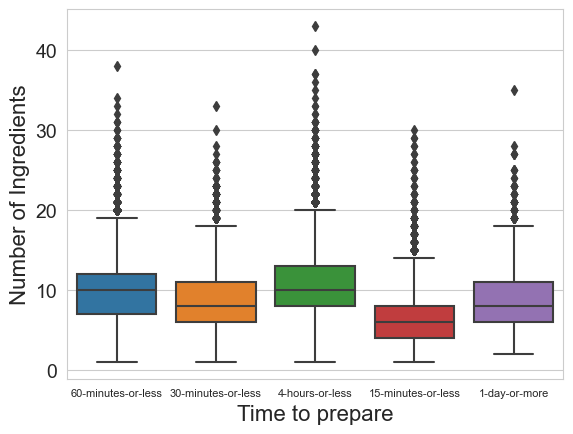

In [22]:
## code here
sns.boxplot(data=RAW_recipes_time_cleaned,
               y = 'n_ingredients',
               x = 'Time_Tags')

plt.ylabel("Number of Ingredients", fontsize=16)
plt.yticks(fontsize=14)

plt.xlabel("Time to prepare", fontsize=16)
plt.xticks(fontsize=8)

plt.show()

The plot above suggests that there is a relation among the number of ingredients and the preparation time of the recipes if the recipe preparation time is under 60 minutes. We will try to analyze this a little further. Also the same graph kind of suggests that this relation is broken if the number of ingredients is above 20. Now we will clean the recipes which requires more than 60 minutes and which needs more than 20 ingredients.

In [30]:
RAW_recipes_time_cleaned2 = RAW_recipes_time_cleaned[RAW_recipes_time_cleaned['n_ingredients'] <= 20].reset_index(drop=True)

In [31]:
RAW_recipes_time_cleaned2 = RAW_recipes_time_cleaned2[RAW_recipes_time_cleaned2['minutes'] <= 60].reset_index(drop=True)

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

We will start with a basic scattering diagram.

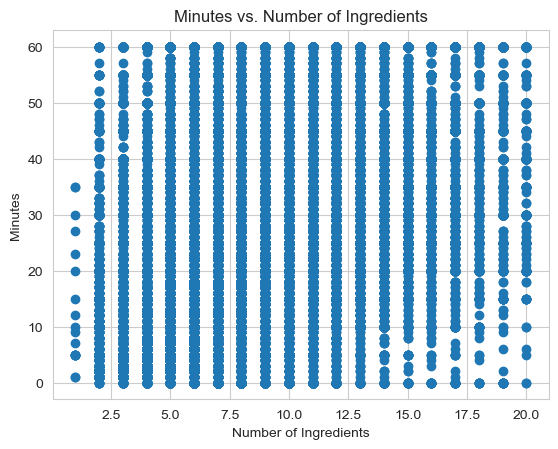

In [37]:
Minutes=RAW_recipes_time_cleaned2['minutes']
N_ingredients=RAW_recipes_time_cleaned2['n_ingredients']
plt.scatter(N_ingredients, Minutes)
plt.title('Minutes vs. Number of Ingredients')
plt.ylabel('Minutes')
plt.xlabel('Number of Ingredients')
plt.show()

The scattering diagram above does not differentiate if at one data point has 10 recipes or 1000 recipes with the same number of ingredients and time for preparation. So we will revise it by increasing the size of data points as the number of recipes corresponding increase.

In [38]:
import numpy as np

Minutes = RAW_recipes_time_cleaned2['minutes']
N_ingredients = RAW_recipes_time_cleaned2['n_ingredients']

# Combine the data into a single array of (x, y) points
points = np.array(list(zip(N_ingredients, Minutes)))

# Get unique points and their counts
unique_points, counts = np.unique(points, axis=0, return_counts=True)

# Extract the unique x and y values
unique_N_ingredients = unique_points[:, 0]
unique_Minutes = unique_points[:, 1]


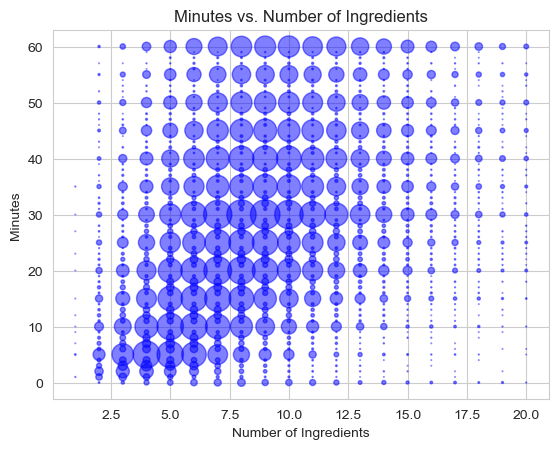

In [39]:
# Define sizes based on counts
sizes = counts/5  # Adjust the multiplier as needed

plt.scatter(unique_N_ingredients, unique_Minutes, s=sizes, c='blue', alpha=0.5)
plt.title('Minutes vs. Number of Ingredients')
plt.ylabel('Minutes')
plt.xlabel('Number of Ingredients')
plt.show()

This suggests that there might be a polynomial relation between the time needed for preparation and the number of ingredients if the preparation time is less than 60 minutes.

We can try to explore the rest later.